# Overview

1. Actions before analysis
2. Working on sample
3. Implementing on dataset
4. Questions and insights

### Actions before analysis
1. Significant columns: Rating from reviewer (out of 5),Review_summary,Review,Likes and Dislikes. (review_timeline column optional)
2. Drop records having N/A values in any of the significant columns
3. Drop insignificant columns and reorder columns
4. Convert review_timeline column into uniform format and sort the dataframe chronologically with this review_timeline column (on Month - year basis)

In [1]:
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from datetime import datetime,date

In [2]:
reviews_df=pd.read_csv(r"C:\Users\srika\OneDrive\Desktop\Python_practise\Projects\EDA_projects\TV_analysis\Customer_reviews_scraping_output.csv")
reviews_df.index=pd.RangeIndex(start=1,stop=reviews_df.shape[0]+1,step=1)
reviews_df

,Reviewer,Rating from reviewer (out of 5),Review_summary,Review,Review_timeline,Likes,Dislikes
1,Aman Soni,5.0,Mind-blowing purchase,Good picture quality,6 months ago,235,27
2,Amolbapu Bhorkade,5.0,Wonderful,Very nice Thomson TV and pictures super qualit...,9 months ago,219,34
3,Manas Karada,5.0,Terrific,Good picture quality I am very happy this price.,6 months ago,63,7
4,Flipkart Customer,5.0,Great product,I like so much,7 months ago,107,15
5,Abbas Sk,5.0,Brilliant,Picture quality good no negative side angle so...,"Jul, 2022",67,8
...,...,...,...,...,...,...,...
3039,Flipkart Customer,5.0,Must buy!,Best,"Jul, 2022",0,0
3040,Flipkart Customer,4.0,Very Good,Good,"Jul, 2022",0,1
3041,Konni Sunil kumar,5.0,Perfect product!,Nice product and service is good,"Jul, 2022",0,0
3042,Megharaj Jawale,1.0,Worthless,Worst,"Jul, 2022",0,3


In [3]:
reviews_df.drop(columns='Reviewer', inplace=True)

In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 1 to 3043
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rating from reviewer (out of 5)  3011 non-null   float64
 1   Review_summary                   3043 non-null   object 
 2   Review                           3033 non-null   object 
 3   Review_timeline                  3043 non-null   object 
 4   Likes                            3043 non-null   int64  
 5   Dislikes                         3043 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 142.8+ KB


In [5]:
reviews_df.dropna(inplace=True)
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3001 entries, 1 to 3043
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rating from reviewer (out of 5)  3001 non-null   float64
 1   Review_summary                   3001 non-null   object 
 2   Review                           3001 non-null   object 
 3   Review_timeline                  3001 non-null   object 
 4   Likes                            3001 non-null   int64  
 5   Dislikes                         3001 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 164.1+ KB


In [6]:
reviews_df=reviews_df[['Review_summary','Review','Review_timeline','Rating from reviewer (out of 5)','Likes','Dislikes']]
reviews_df.head(10)

,Review_summary,Review,Review_timeline,Rating from reviewer (out of 5),Likes,Dislikes
1,Mind-blowing purchase,Good picture quality,6 months ago,5.0,235,27
2,Wonderful,Very nice Thomson TV and pictures super qualit...,9 months ago,5.0,219,34
3,Terrific,Good picture quality I am very happy this price.,6 months ago,5.0,63,7
4,Great product,I like so much,7 months ago,5.0,107,15
5,Brilliant,Picture quality good no negative side angle so...,"Jul, 2022",5.0,67,8
6,Great product,I first buy smart TVs which I am very happy!Fo...,10 months ago,5.0,1068,230
7,Must buy!,Good led tv .picture quality very nice but sou...,9 months ago,5.0,46,5
8,Worth every penny,Good budget product,"Jul, 2022",5.0,123,21
9,Brilliant,Worth for Money picture quality also awesome s...,6 months ago,5.0,86,14
10,Excellent,Best,"Jul, 2022",5.0,52,7


##### Formatting Review_timeline column

In [7]:
# Since all the records are in either of the formats: 'X months ago' or 'MMMM, YYYY' or 'X days ago' we use below approach:
#         ----> Create a month_dictionary and split the string to check 1st and last elements if they can be converted to int types.
#         ----> If the 1st element is convertable; it implies the corresponding record is of 'X months/days ago' type.Create a function which:return it in form of 'MMMM, YYYY'(handling both months and days ago cases)
#         ----> Else, if the last element is convertable, it means the record is already in 'MMM, YYYY' format, so we just change it into date type from string.
#         ----> Maintain pecision till month and year level
# Before applying the function to the dataframe, remove any other characters(',') as we split based on comma and dictionary values are predefined


In [8]:
def change_date_format(review_timeline):
    # Removing any unwanted characters like comma
    review_timeline = review_timeline.replace(',', '')
    # A dictionary to map month names to their numeric values
    months_dict = {
        'Jan': 1,'Feb': 2,'Mar': 3,'Apr': 4,'May': 5,'Jun': 6,
        'Jul': 7,'Aug': 8,'Sep': 9,'Oct': 10,'Nov': 11,'Dec': 12
    }
    # Finding current month and date
    current_day = date.today().day
    current_month = date.today().month
    current_year = date.today().year
    # Splitting review_timeline string
    date_elements=review_timeline.split()
    # Handling 'Jun 2022' cases
    if len(date_elements) == 2:
        result_year = int(date_elements[-1])
        result_month = months_dict[date_elements[0]]
        result_date = datetime(result_year, result_month, 1).date()
        return result_date
    # Handling '11 months ago' cases
    elif len(date_elements)==3 and date_elements[1]=='months':
        try:
            # Extarcting months_ago
            months_ago = int(date_elements[0])
            # Finding number of years and months to subtract
            years_to_subtract = months_ago // 12
            months_to_subtract = months_ago % 12
            # Calculate the result month and year
            result_year = current_year - years_to_subtract
            result_month_num = current_month - months_to_subtract
            # For -ve or 0 month difference
            if result_month_num <= 0:
                result_year -= 1
                result_month_num += 12
            # Final result for months
            result_month = result_month_num
            # Format the result as 'Month Year' string and return
            result_date = datetime(result_year, result_month, 1).date()
            return result_date
        except (ValueError, KeyError):
            print("Invalid input format")
    # Handling '10 days ago' cases
    else:
        if int(date_elements[0])<current_day:
            result_month=current_month
            result_year=current_year
        else:
            month=current_month -(int(date_elements[0])//30)
            result_month=month-1
            result_year=current_year
        result_date = datetime(result_year, result_month, 1).date()
        return result_date
    
# Example usage:
# review_timeline = '16 months ago'
# result_date = change_date_format(review_timeline)
# print(result_date)

In [9]:
# Applying the change_date_format function to dataframe.
reviews_df['Review_timeline'] = reviews_df['Review_timeline'].apply(change_date_format)

In [10]:
# Sorting for most recent reviews (on Month and year basis)
reviews_df.sort_values('Review_timeline',ascending=False,inplace=True)
reviews_df.head(5)

,Review_summary,Review,Review_timeline,Rating from reviewer (out of 5),Likes,Dislikes
860,Super!,Thank you 😊,2023-08-01,5.0,0,0
719,Must buy!,"As per budget, it is a good product.",2023-08-01,5.0,0,0
721,Classy product,Good quality,2023-08-01,5.0,0,0
722,Really Nice,Budget Friendly,2023-08-01,4.0,0,0
723,Great product,Not bad,2023-08-01,5.0,0,0


#### Review and review summary analysis

In [11]:
# 1) Break down all reviews to word level, take their corresponding counts and make a plot on these to show word frequency of all customer review.
# 2) Define various collections to classify unique tokens and assign weights appropriately for them at word and phrase levels. Create plots showing the weights assined to collections.
# 3) Split the review based on the parameter and then compute the main objective -> 'customer_impression'. We will then assign numerical weights at word and phrase level to the split objects. (derive a best fit mathematical formula to calculate the assigned weights)
# 4) Consider the likes and dislikes count of that review into the calculation.
# 5) Once we are done with individual 'customer_impression', then its time to have mean /median/best suitable statistical parameter to the product level.
# 6) Since we already have dates of these 3000 reviews, we will also see the ratings by users on monthly basis (some good plots as well), see how many reviews we get on monthly basis and how many good / bad reviews (based on likes and dislikes of each review)


##### Breakdown to word level

In [12]:
### Function for breaking down reviews and summary to word level

def tokenize_and_count_words(review):
    word_counts = {}
    review = review.lower()
    words = re.findall(r'[A-Za-z\'-]+', review)
    for word in set(words):
        word_counts[word]=words.count(word)
    return word_counts
# Gathering text from the list of all reviews, punctuation-free
review_summary_column = reviews_df['Review_summary'].str.replace('[^A-Za-z\s]', '', regex=True).to_list()
all_review_summary_text = ' '.join(review_summary_column)
review_column = reviews_df['Review'].str.replace('[^A-Za-z\s]', '', regex=True).to_list()
all_review_text = ' '.join(review_column)

word_counts_dict_review_summary = tokenize_and_count_words(all_review_summary_text)
word_counts_dict_review = tokenize_and_count_words(all_review_text)
# Sorting on frequency basis
word_counts_dict_review_summary = dict(sorted(word_counts_dict_review_summary.items(), key=lambda item: item[1], reverse=True))
word_counts_dict_review = dict(sorted(word_counts_dict_review.items(), key=lambda item: item[1], reverse=True))
# print(all_review_summary_text)
# print(word_counts_dict_review_summary)
# print(word_counts_dict_review)

In [13]:
len(word_counts_dict_review)

1688

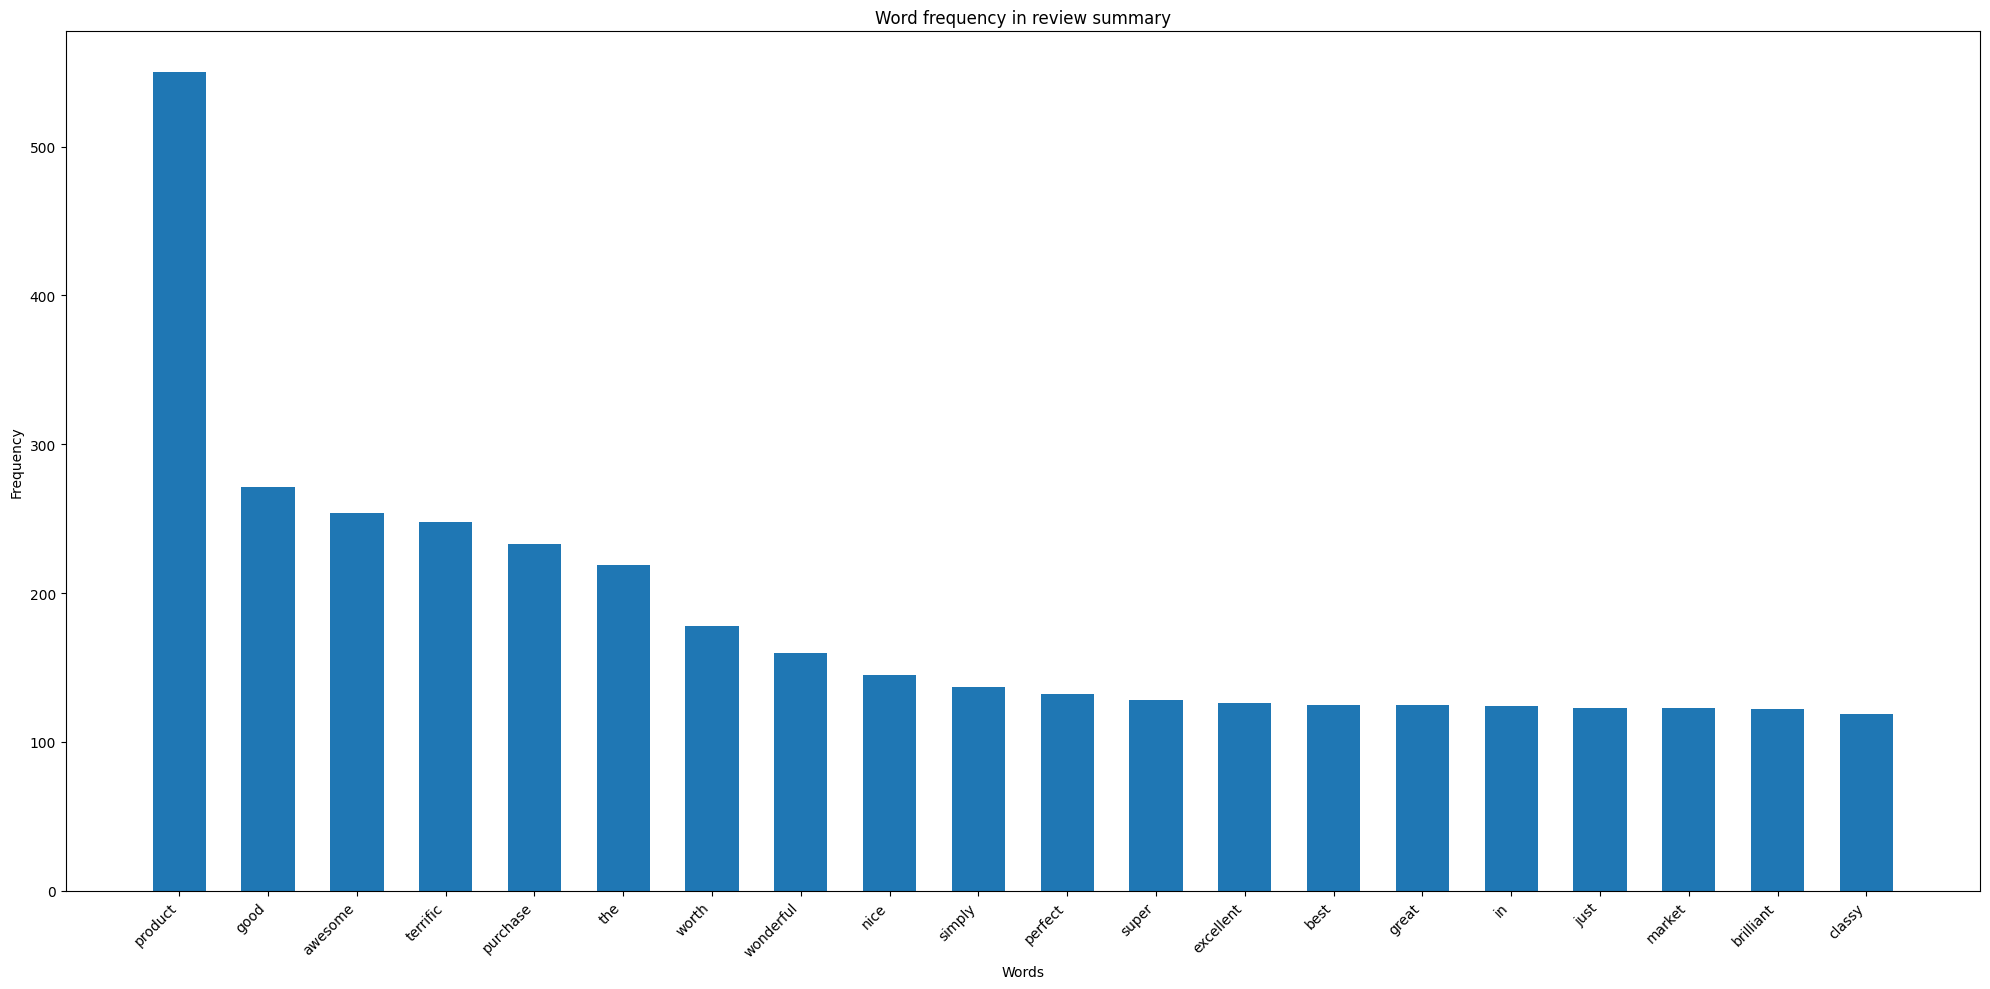

In [14]:
# Plotting the word frequencies from review_summary
words = list(word_counts_dict_review_summary.keys())[:20]
frequencies = list(word_counts_dict_review_summary.values())[:20]
plt.figure(figsize=(20, 10))
plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
# plt.title(f'Top {top_n} Most Common Words')
plt.title('Word frequency in review summary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout();

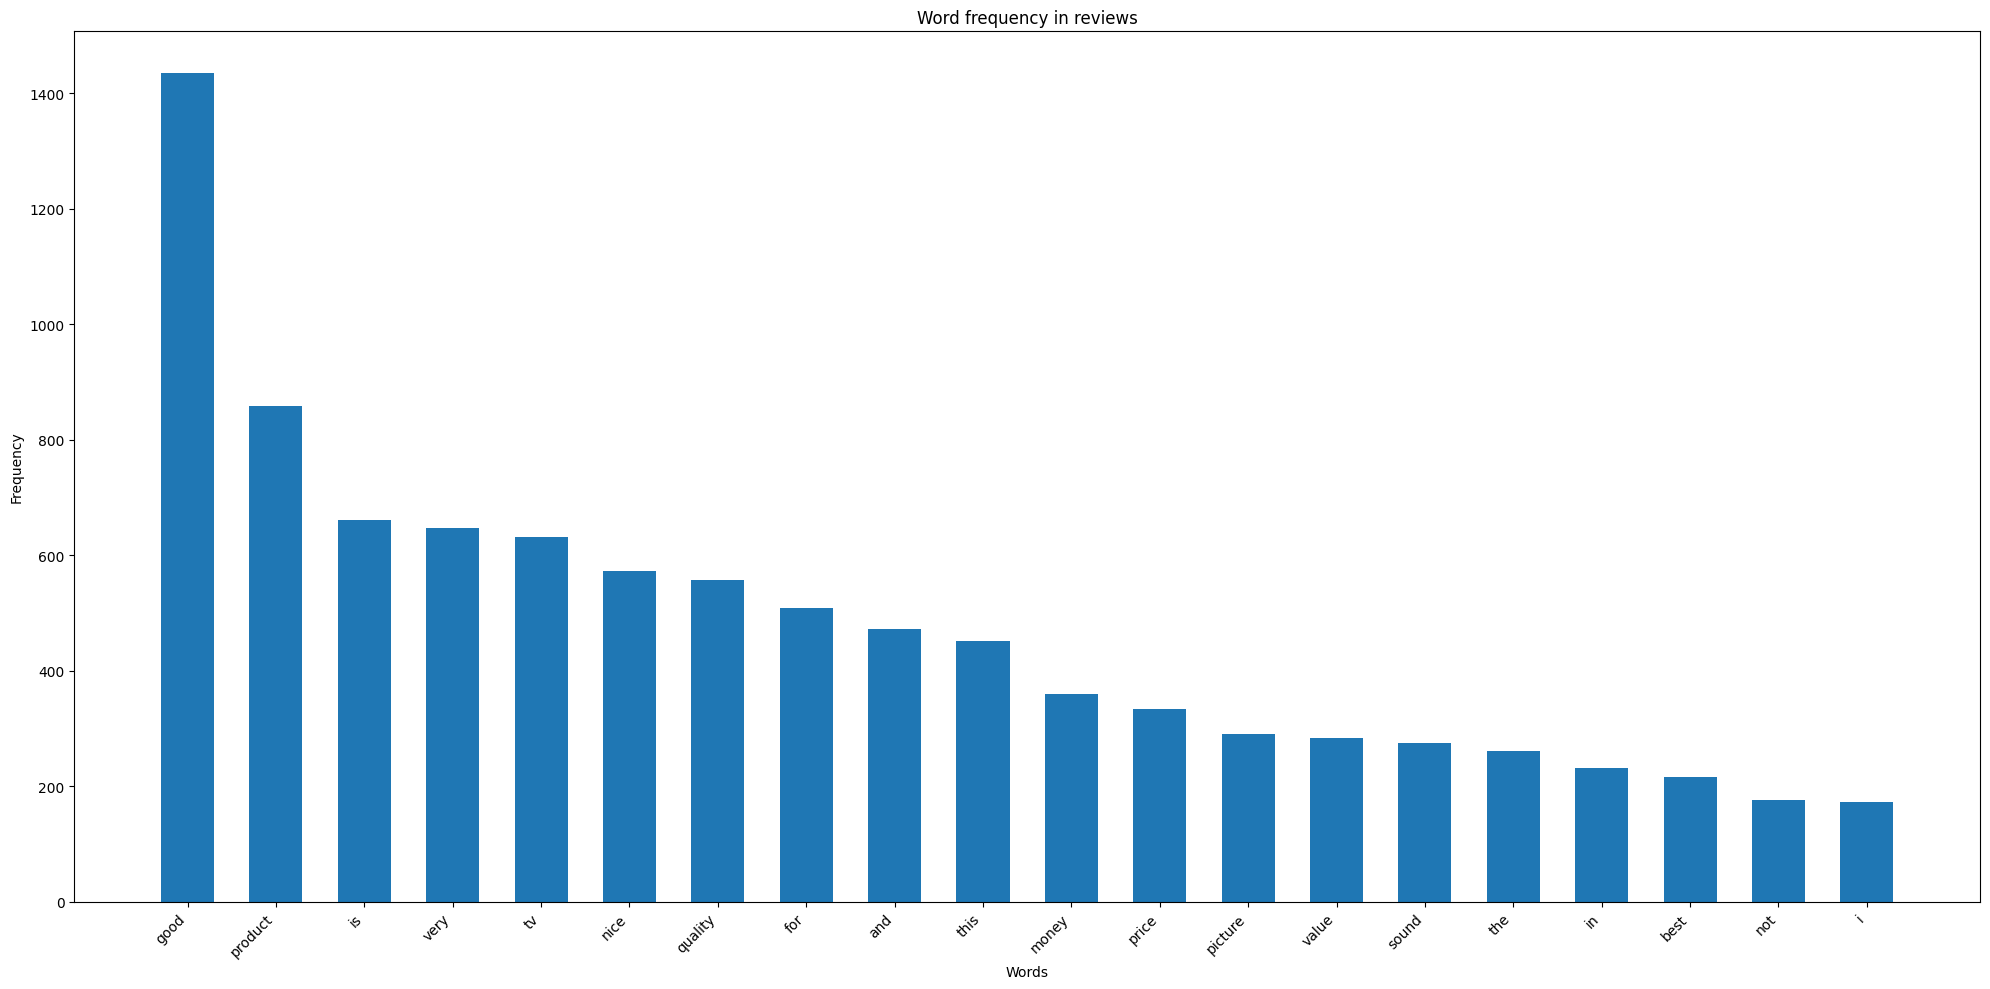

In [15]:
# Plotting the word frequencies from reviews
words = list(word_counts_dict_review.keys())[:20]
frequencies = list(word_counts_dict_review.values())[:20]
plt.figure(figsize=(20, 10))
plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
# plt.title(f'Top {top_n} Most Common Words')
plt.title('Word frequency in reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout();

In [16]:
# Removing filler / stop words from the collections. We check if the word/key belongs to most common stop words

stop_words_list = ['I', 'am', 'a', 'an', 'the', 'and', 'but', 'or', 'in', 'on', 'at', 'for', 'with', 'who', 'of', 'is', 'are', 'was', 'were', 'to', 'it', 'its', 'you', 'your', 'we', 'our', 'they', 'their', 'those', 'me', 'my', 'mine']

# Remove stop words from word_counts_dict_review_summary
filtered_review_summary_dict = {word: count for word, count in word_counts_dict_review_summary.items() if word not in stop_words_list}

# Remove stop words from word_counts_dict_review_summary
filtered_review_dict = {word: count for word, count in word_counts_dict_review.items() if word not in stop_words_list}

# print(filtered_review_summary_dict)
print(filtered_review_dict)


{'good': 1435, 'product': 858, 'very': 648, 'tv': 631, 'nice': 573, 'quality': 557, 'this': 452, 'money': 359, 'price': 334, 'picture': 290, 'value': 284, 'sound': 275, 'best': 217, 'not': 177, 'i': 173, 'super': 135, 'excellent': 126, 'thomson': 125, 'installation': 110, 'worth': 93, 'flipkart': 92, 'budget': 91, 'ok': 87, 'awesome': 86, 'buy': 84, 'range': 79, 'happy': 77, 'great': 76, 'one': 66, 'low': 66, 'working': 65, 'also': 64, 'thanks': 64, 'smart': 61, 'like': 56, 'bad': 55, 'so': 55, 'no': 53, 'all': 53, 'led': 53, 'thank': 50, 'overall': 50, 'service': 49, 'delivery': 48, 'superb': 47, 'from': 41, 'as': 41, 'better': 40, 'amazing': 39, 'go': 39, 'time': 38, 'connectivity': 36, 'fine': 35, 'experience': 32, 'worst': 32, 'really': 31, 'dont': 31, 'after': 31, 'just': 31, 'have': 31, 'brand': 30, 'poor': 29, 'other': 28, 'only': 28, 'too': 28, 'any': 27, 'by': 27, 'products': 27, 'display': 27, 'affordable': 27, 'performance': 26, 'satisfied': 26, 'screen': 24, 'cost': 23, 'th

In [17]:
len(filtered_review_dict)

1659

##### Definitions

In [18]:
# Aspects to analyze

Parameters_to_analyze = ['audio','sound','picture','video','price','money','cost', 'product','tv']

In [19]:
# Impact Words (Positive and Negative)
impact_words = {
    'good': 1.0,
    'classy': 0.7,
    'excellent': 1.2,
    'awesome': 1.3,
    'wonderful': 1.1,
    'nice': 0.8,
    'perfect': 1.2,
    'super': 1.1,
    'fabulous': 1.2,
    'outstanding': 1.3,
    'worth': 0.8,
    'lovely': 0.65,
    'amazing': 1.2,
    'ideal': 1.0,
    'best': 1.275,
    'rich': 0.8,
    'ok': 0.55,
    'poor': -0.8,
    'worst': -1.35,
    'fair': 0.6,
    'low': -0.7,
    'bad': -1.0,
    'poor': -0.9,
    'terrible': -1.3,
    'disappoint': -1.2,
    'awful': -1.2,
    'horrible': -1.3,
    'dislike': -0.8,
    'displease': -0.9,
    'unhappy': -0.8,
    'disgust': -1.3,
    'regret': -1.2,
    'pathetic': -1
}

In [20]:
# Intensifiers
intensifiers = {
    'too': 0.975,
    'very': 0.65,
    'totally': 0.825,
    'utterly': 0.1,
    'completely': 0.85,
    'hardly': 0.2,
    'barely': 0.1,
    'slightly': 0.6,
    'quite': 0.65,
    'somewhat': 0.45,
    'really': 0.875,
    'highly': 0.925,
    'extremely': 0.9,
    'incredibly': 0.955,
    'absolutely': 0.95,
    'definitely': 0.975,
    'remarkably': 0.9,
    'horrible': 0.875,
    'really': 0.8
}

In [21]:
# Transition Words / post dependent words
transition_words = {
    'but': 0.4,
    'however': 0.6,
    'although': 0.5,
    'while': 0.45,
    'in fact': 0.25,
    'moreover': 0.3,
    'on the other hand': 0.1,
    'despite': 0.6,
    'nevertheless': 0.1,
    'even though': 0.1,
    'conversely': 0.75,
    'furthermore': 0.1,
    'likewise': 0.1,
    'meanwhile': 0.1,
    'instead': 0.65,
    'otherwise': 0.5,
    'similarly': 0.75,
}

In [22]:
# Phrases
phrases = {
 'value for money': 0.9,
 'go for it': 1.0,
 'does the job': 0.8,
 'worth the price': 0.75,
 'pretty decent': 0.7,
 'best in the market': 1.3,
 'could be better': 0.55,
 'no complaints': 0.75,
 "don't buy": -1.0,
 "highly recommended": 1.25
}

In [23]:
# Negation Words
negation_words = {
    'not': -0.975,
    'never': -1.0,
    'none': -0.5,
    'hardly': -0.6,
    'neither': -0.5,
    'nor': -0.5,
    'no': -0.7,
    'nothing': -0.7,
    'nobody': -0.7,
    'nowhere': -0.7,
    'scarcely': -0.6,
    'barely': -0.6,
    'doesn’t': -0.9,
    'isn’t': -0.9,
    'wasn’t': -0.9,
    'shouldn’t': -1.0,
    'wouldn’t': -1.0,
    'couldn’t': -1.0,
    'won’t': -1.0,
    'can’t': -0.8,
}

In [24]:
word_collections=[impact_words,intensifiers,transition_words,negation_words]
# print(word_collections)

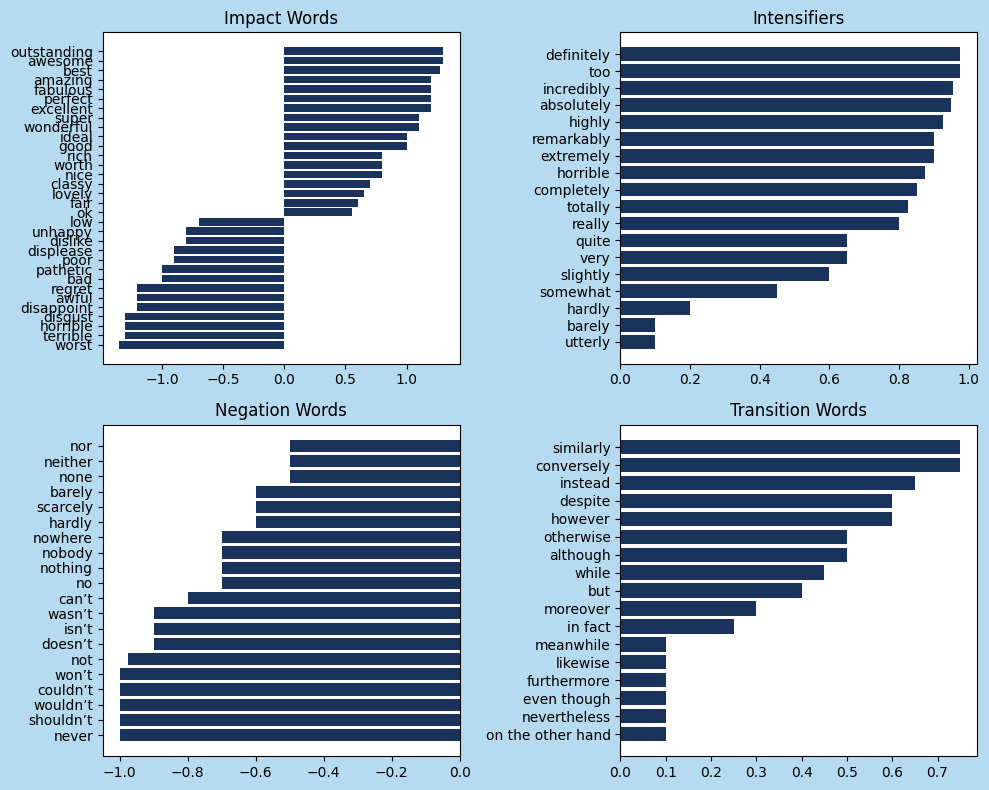

In [25]:
# Plotting the collections and their assigned weights

def plot_2x2_horizontal_bars(data, titles):
    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 8),facecolor='#b6dbf0',dpi=100)

    # Plot data on each subplot as horizontal bar plots
    for i in range(2):
        for j in range(2):
            word_weights = sorted(data[i*2+j].items(), key=lambda x: x[1], reverse=False)
            words, weights = zip(*word_weights)
            axs[i, j].barh(words, weights, color='#1a335c')
            axs[i, j].set_title(titles[i*2+j])
    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

# Titles for each subplot
titles = ['Impact Words', 'Intensifiers', 'Negation Words', 'Transition Words']

# Create a list of defined collections
data = [impact_words, intensifiers, negation_words, transition_words]
plot_2x2_horizontal_bars(data, titles)


In [26]:
def extract_sentiment(review):
    aspects = Parameters_to_analyze
    sentiment = {}  # Dictionary to store sentiment for each aspect
    review=re.sub('\.{2,}','', review) # Remove 2 or more consecutive dots in the input review
    sentences = review.lower().split('.') # Lower the case and split into sentences
    sentence_num = 1
    
    for sentence in sentences:
        sentence=sentence.strip()
        sentence_dict = {
            'phrases': 0,
            'aspect': [],
            'impact': {},
            'intensifiers': 0,
            'negation_words': 0,
            'transition_words': 0
        }
#         print(sentence.strip())
        # Check for phrases, aspects, impact words, intensifiers, negation words, and transition words
        for p in phrases:
            if re.search(r'\b' + re.escape(p) + r'\b', sentence):
                sentence_dict['phrases'] = phrases[p]
    
        for a in aspects:
            if re.search(r'\b' + re.escape(a) + r'\b', sentence):
                sentence_dict['aspect'].append(a)
                
        for i in impact_words:
            if re.search(r'\b' + re.escape(i) + r'\b', sentence):
                sentence_dict['impact']={i: impact_words[i]}

        for j in intensifiers:
            if re.search(r'\b' + re.escape(j) + r'\b', sentence):
                sentence_dict['intensifiers'] = intensifiers[j]

        for n in negation_words:
            if re.search(r'\b' + re.escape(n) + r'\b', sentence):
                sentence_dict['negation_words'] = negation_words[n]

        for t in transition_words:
            if re.search(r'\b' + re.escape(t) + r'\b', sentence):
                sentence_dict['transition_words'] = transition_words[t]

        sentiment[sentence_num] = sentence_dict
        sentence_num += 1
        
    return sentiment


In [27]:
def sentiment_aggregation(sentences_sentiments):
    Sentence_sentiment_weights={}
    phrase_score,aspects,impact_score,intensifiers_score,negation_score,transition_score=[[] for i in range(6)]
    for i in sentences_sentiments:
#         print('Sentence -',i)
        phrase_score.append(sentences_sentiments[i]['phrases'])
        aspects.append(sentences_sentiments[i]['aspect'])
        impact_score.append(list(sentences_sentiments[i]['impact'].values())[0] if sentences_sentiments[i]['impact']!={} else 0)
        intensifiers_score.append(sentences_sentiments[i]['intensifiers'])
        negation_score.append(sentences_sentiments[i]['negation_words'])
        transition_score.append(sentences_sentiments[i]['transition_words'])
        
        if impact_score[i-1]>=0:
            Sentence_sentiment_weights[i] =((phrase_score[i-1]+impact_score[i-1]+(1+(intensifiers_score[i-1])))*(negation_score[i-1] if negation_score[i-1]!=0 else 1))+transition_score[i-1]
        else:
            Sentence_sentiment_weights[i] =((phrase_score[i-1]+impact_score[i-1]+(1-(intensifiers_score[i-1])))*(negation_score[i-1] if negation_score[i-1]!=0 else 1))+transition_score[i-1]
        
#     print(phrase_score,impact_score,intensifiers_score,aspects,negation_score,transition_score)
    review_score = sum(Sentence_sentiment_weights.values())
#     return Sentence_sentiment_weights
    
    return review_score


In [28]:
sample_review_score=sentiment_aggregation(extract_sentiment(input()))
sample_review_score

Nice led but sound quality  6/10 point


2.2

In [29]:
# Creating review_score column

reviews_df['Review_score'] = reviews_df['Review'].apply(lambda review: sentiment_aggregation(extract_sentiment(review)))

In [30]:
reviews_df.sample(10)

,Review_summary,Review,Review_timeline,Rating from reviewer (out of 5),Likes,Dislikes,Review_score
1205,Excellent,Nice product,2023-05-01,5.0,0,0,1.800
109,Perfect product!,"Delivery and installation is good, appears goo...",2022-07-01,5.0,1,0,4.000
1628,Fabulous!,Very very good quality 👌,2023-03-01,5.0,0,0,2.650
261,Useless product,"Do not have voice assistant, .5 gb ram do not ...",2022-06-01,1.0,10,45,-1.950
2569,Terrible product,The worst TV and customer care Executive is al...,2022-11-01,1.0,0,0,0.650
506,Super!,Impressed and worth for money.size display sou...,2023-07-01,5.0,0,0,5.775
2095,Best in the market!,Nice,2023-01-01,5.0,0,0,1.800
1885,Perfect product!,Good,2023-02-01,5.0,0,0,2.000
1777,Simply awesome,Good,2023-03-01,5.0,0,0,2.000
2485,Awesome,Gud,2022-11-01,5.0,0,0,1.000


In [31]:
reviews_df.loc[35]

Review_summary                                                                Super!
Review                             Got this delivered within a day and installed ...
Review_timeline                                                           2022-10-01
Rating from reviewer (out of 5)                                                  5.0
Likes                                                                             11
Dislikes                                                                           0
Review_score                                                                     9.4
Name: 35, dtype: object

In [32]:
# Creating customer_score column

# Assuming we trust the customer actions (reviews and likes/dislikes) to 80%

def calculate_customer_impression(row):
    likes = row['Likes']
    dislikes = row['Dislikes']
    rating = row['Rating from reviewer (out of 5)']
    review_score = row['Review_score']
    
    if (likes != 0) or (dislikes != 0):
        like_weight = likes / (likes + dislikes)
    else:
        like_weight = 1
        
    Customer_impression = rating + (review_score * like_weight * 0.8)
    return round(Customer_impression,2)

reviews_df['Customer_impression'] = reviews_df.apply(calculate_customer_impression, axis=1)


In [33]:
reviews_df.sample(10)

,Review_summary,Review,Review_timeline,Rating from reviewer (out of 5),Likes,Dislikes,Review_score,Customer_impression
2530,Delightful,Value of moeny product,2022-11-01,4.0,0,0,1.00,4.80
1643,Great product,Mast product must buy ...,2023-03-01,5.0,0,0,1.00,5.80
766,Simply awesome,Nice TV,2023-08-01,5.0,0,0,1.80,6.44
753,Utterly Disappointed,Totally colours in display completely frud pro...,2023-08-01,1.0,0,0,0.85,1.68
639,Mind-blowing purchase,Awesome product 😍,2023-07-01,5.0,0,0,2.30,6.84
38,Worthless,"Ok product, can't expect more.... sound qualit...",2022-11-01,1.0,8,1,-0.80,0.43
1502,Perfect product!,Good product,2023-04-01,5.0,0,0,2.00,6.60
846,Super!,Really good,2023-08-01,5.0,0,0,2.80,7.24
696,Classy product,Value for money... Good one..,2023-08-01,5.0,0,0,2.90,7.32
1507,Good quality product,Awesome 😎😎 good quality,2023-04-01,4.0,0,0,2.30,5.84


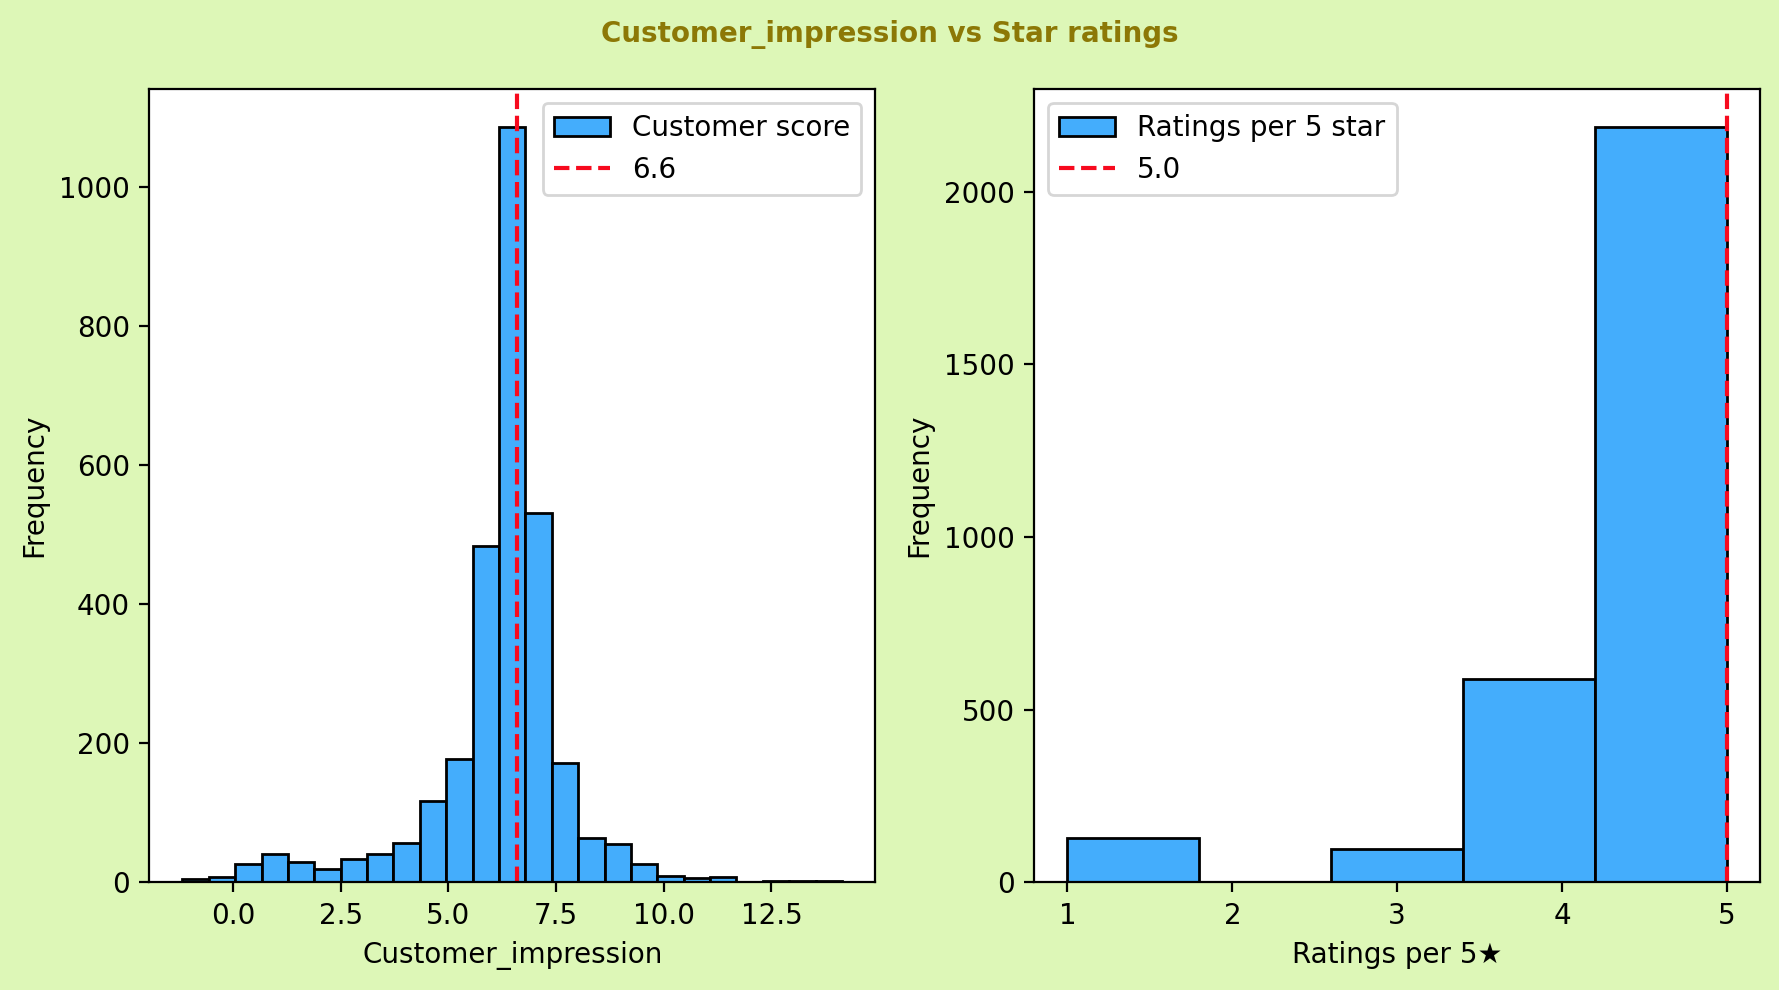

In [34]:
fig,axes=plt.subplots(1,2,facecolor='#ddf7b7',figsize=(9,5),dpi=200)
plt.suptitle('Customer_impression vs Star ratings',color='#8c7806',weight='bold',size=10)
# 1st histogram
axes[0].hist(reviews_df['Customer_impression'], bins=25,edgecolor='k',color='#44adfc',label='Customer score')
axes[0].axvline(reviews_df['Customer_impression'].median(), color='#f70a1e', linestyle='dashed', linewidth=1.5,label=reviews_df['Customer_impression'].median())
axes[0].set_xlabel('Customer_impression')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# 2nd histogram
axes[1].hist(reviews_df['Rating from reviewer (out of 5)'], bins=5,edgecolor='k',color='#44adfc',label='Ratings per 5 star')
axes[1].axvline(reviews_df['Rating from reviewer (out of 5)'].median(), color='#f70a1e', linestyle='dashed', linewidth=1.5,label=reviews_df['Rating from reviewer (out of 5)'].median())
axes[1].set_xlabel('Ratings per 5★')
axes[1].set_ylabel('Frequency')
axes[1].legend()
plt.tight_layout();

Enter month-year in MMM YYYY format(month in 3 letters): Jan 2023


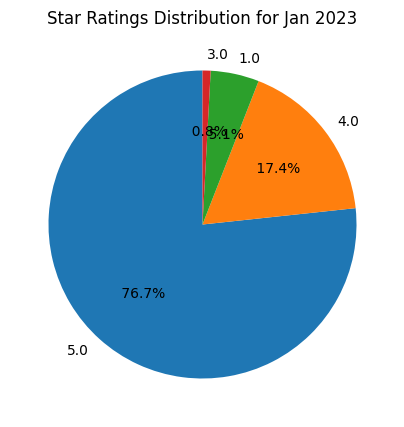

In [35]:
# Convert the 'Review Date' column to datetime
reviews_df['Review_timeline'] = pd.to_datetime(reviews_df['Review_timeline'])

# Get the input month in the format 'MMM YYYY'
input_month=input('Enter month-year in MMM YYYY format(month in 3 letters): ').title()

filtered_df = reviews_df[reviews_df['Review_timeline'].dt.strftime('%b %Y') == input_month]
star_counts = filtered_df['Rating from reviewer (out of 5)'].value_counts()
# Plot the pie chart
plt.figure(figsize=(16, 5))
plt.pie(star_counts, labels=star_counts.index, autopct='%5.1f%%', startangle=90)
plt.title(f'Star Ratings Distribution for {input_month}')
plt.show()


In [36]:
reviews_df.sample(10)

,Review_summary,Review,Review_timeline,Rating from reviewer (out of 5),Likes,Dislikes,Review_score,Customer_impression
2,Wonderful,Very nice Thomson TV and pictures super qualit...,2022-11-01,5.0,219,34,2.75,6.90
1800,Terrific purchase,Very good,2023-02-01,5.0,0,0,2.65,7.12
1250,Pretty good,Overall very good but takes a lot of time to s...,2023-05-01,4.0,0,0,3.05,6.44
2951,Classy product,Good product,2022-09-01,5.0,0,0,2.00,6.60
239,Awesome,Nice tv ...value for money ❤,2022-10-01,5.0,0,0,2.70,7.16
149,Must buy!,It's very Good And value for Money,2022-07-01,5.0,1,0,3.55,7.84
2597,Good quality product,Good and smooth looking tv,2022-11-01,4.0,0,0,2.00,5.60
70,Does the job,"As for the price is concerned, The Picture qua...",2022-07-01,3.0,3,0,1.10,3.88
698,Brilliant,Less Price and Good Product,2023-08-01,5.0,0,0,2.00,6.60
2385,Useless product,Worst company don't buy and loose money,2022-11-01,1.0,0,0,-1.35,-0.08
